In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
obs_data = pd.read_csv("observations.csv",header=0)
info_data = pd.read_csv("species_info.csv",header=0)

In [5]:
print(obs_data.info())
print(info_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [6]:
obs_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [7]:
info_data.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
park_unique = obs_data['park_name'].unique()
park_unique

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [15]:
df = obs_data.copy()
df = df.replace({'park_name':{park_unique[0]:"GSNP", park_unique[1]:"YoNP", park_unique[2]:"BNP",park_unique[3]:"YeNP"}})
df['observations'].groupby(df['park_name']).sum()

park_name
BNP      576025
GSNP     431820
YeNP    1443562
YoNP     863332
Name: observations, dtype: int64

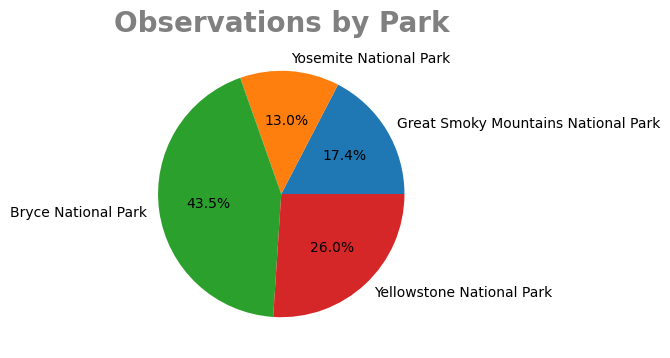

In [47]:
plt.figure(figsize=(10,4))
plt.pie(df['observations'].groupby(df['park_name']).sum(),autopct='%1.1f%%',labels=park_unique)
plt.title('Observations by Park',fontsize=20,fontweight='bold',color='gray',loc='center')
# plt.legend(park_unique,loc='upper right',bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()